In this notebook, I analyse the distribution of labels per domains and compare them.

In [2]:
import pandas as pd
import numpy as np
import regex as re
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns

## Label distribution per domain

In [7]:
# Open the file
ginco = pd.read_csv("/home/tajak/Applying-GENRE-on-MaCoCu-bilingual/MaCoCu-sl/Macocu-sl-en-predicted.csv",index_col=0)
ginco.head(2)

,biroamer_entities,translation_direction,en_source,en_var_doc,en_var_dom,sl_source,en_domain,sl_domain,average_score,en_doc,sl_doc,en_length,sl_length,punct_ratio,X-GENRE,label_distribution,chosen_category_distr,final-X-GENRE
2584979,No,sl-orig,http://15.liffe.si/?lang_chg=en,B,B,http://15.liffe.si/?lang_chg=sl,15.liffe.si,15.liffe.si,0.936808,It went out with a bang. The evening sparkled ...,Končalo se je razburljivo in z razkošjem. Veče...,574,463,0.103501,Opinion/Argumentation,"{'Other': 0.0003, 'Information/Explanation': 0...",0.988794,Opinion/Argumentation
1212933,No,sl-orig,http://16.liffe.si/?lang_chg=en,B,B,http://16.liffe.si/index.php?menu_item=domov,16.liffe.si,16.liffe.si,0.900000,Some days ago the organisers of the 17th Liffe...,Pred dnevi smo se iz 59. mednarodnega filmskeg...,293,184,0.076220,News,"{'Other': 0.0009, 'Information/Explanation': 0...",0.961600,News


In [8]:
ginco.describe(include="all")

,biroamer_entities,translation_direction,en_source,en_var_doc,en_var_dom,sl_source,en_domain,sl_domain,average_score,en_doc,sl_doc,en_length,sl_length,punct_ratio,X-GENRE,label_distribution,chosen_category_distr,final-X-GENRE
count,101807,101807,101807,101807,101807,101807,101807,101807,101807.000000,101807,101807,101807.000000,101807.000000,101807.000000,101807,101807,101807.000000,91459
unique,2,2,101807,4,4,92708,6066,6066,NaN,101807,92544,NaN,NaN,NaN,9,42318,NaN,7
top,No,sl-orig,http://15.liffe.si/?lang_chg=en,B,B,https://www.sofascore.com/sl/ekipa/nogomet/vik...,oblacila.si,oblacila.si,NaN,It went out with a bang. The evening sparkled ...,"Ali se strinjate, da na vaš računalnik namesti...",NaN,NaN,NaN,Information/Explanation,"{'Other': 0.0001, 'Information/Explanation': 0...",NaN,Information/Explanation
freq,89024,90537,1,42890,57737,9,3600,3600,NaN,1,30,NaN,NaN,NaN,32368,5988,NaN,30307
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.897452,NaN,NaN,428.811084,495.158761,0.092997,NaN,NaN,0.970066,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.063443,NaN,NaN,1694.062268,2320.090506,0.027555,NaN,NaN,0.089027,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.502000,NaN,NaN,75.000000,2.000000,0.015000,NaN,NaN,0.247184,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.868429,NaN,NaN,119.000000,93.000000,0.074830,NaN,NaN,0.995622,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.913667,NaN,NaN,190.000000,165.000000,0.089552,NaN,NaN,0.998666,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.942684,NaN,NaN,346.000000,324.000000,0.106952,NaN,NaN,0.998966,NaN


In [12]:
# Use only rows with final X-GENRE labels
ginco = ginco.dropna(subset=["final-X-GENRE"])
ginco.shape

(91459, 18)

In [13]:
# Analyse domain distribution
ginco.en_domain.value_counts()

oblacila.si                     3488
europarl.europa.eu              2101
eur-lex.europa.eu               2011
eu2008.si                       1249
gov.si                          1003
                                ... 
s-kzg.si                           1
sajna.si                           1
eyra-elektronika.si                1
saleskibiografskileksikon.si       1
15.liffe.si                        1
Name: en_domain, Length: 5820, dtype: int64

In [16]:
# Filter out the domains that occur less than 10 times
unq,count = np.unique(ginco.en_domain,return_counts=True)

out = unq[count>=10]

filtered_df = ginco[ginco['en_domain'].isin(out)]

In [17]:
filtered_df.shape

(78568, 18)

In [19]:
filtered_df.en_domain.describe(include="all")

count           78568
unique           1396
top       oblacila.si
freq             3488
Name: en_domain, dtype: object

In [20]:
filtered_df.columns

Index(['biroamer_entities', 'translation_direction', 'en_source', 'en_var_doc',
       'en_var_dom', 'sl_source', 'en_domain', 'sl_domain', 'average_score',
       'en_doc', 'sl_doc', 'en_length', 'sl_length', 'punct_ratio', 'X-GENRE',
       'label_distribution', 'chosen_category_distr', 'final-X-GENRE'],
      dtype='object')

In [21]:
# Create a dataframe to analyse the distribution of instance-level labels in domains

def genre_analysis(genre_column):
	corpus_analysis_dict = filtered_df.reset_index().groupby("en_domain")[genre_column].apply(list).to_dict()
	corpus_analysis_series = pd.Series(list(corpus_analysis_dict.values()), index = list(corpus_analysis_dict.keys()))

	df_items = list(corpus_analysis_dict.values())

	corpus_analysis_df = pd.DataFrame({f"genre-per-domain_{genre_column}": corpus_analysis_series, "domain_id": corpus_analysis_series.index, f"unique_values_{genre_column}": [len(set(x)) for x in df_items], f"label_count_{genre_column}": [dict(Counter(x)) for x in df_items]})
	return corpus_analysis_df

genre_distribution = genre_analysis("final-X-GENRE")

genre_distribution.head()


,genre-per-domain_final-X-GENRE,domain_id,unique_values_final-X-GENRE,label_count_final-X-GENRE
100letprve.si,"[Information/Explanation, News, Information/Ex...",100letprve.si,3,"{'Information/Explanation': 15, 'News': 8, 'Op..."
1ka.si,"[Instruction, Instruction, Instruction, Instru...",1ka.si,6,"{'Instruction': 82, 'Information/Explanation':..."
2010-2016.borstnikovo.si,"[Information/Explanation, Opinion/Argumentatio...",2010-2016.borstnikovo.si,6,"{'Information/Explanation': 124, 'Opinion/Argu..."
2011.festivalmaribor.si,"[Information/Explanation, News, Opinion/Argume...",2011.festivalmaribor.si,4,"{'Information/Explanation': 52, 'News': 2, 'Op..."
2012.festivalmaribor.si,"[Opinion/Argumentation, News, News, Informatio...",2012.festivalmaribor.si,4,"{'Opinion/Argumentation': 7, 'News': 7, 'Infor..."


In [57]:
# Add the frequency of the most common label (per domain)
label_count_list = list(genre_distribution["label_count_final-X-GENRE"])
most_common_label_frequency = []

for i in label_count_list:
	biggest_number = max(list(i.values()))
	total = sum(list(i.values()))

	# Frequency of the most frequent label
	frequency = biggest_number/total*100

	most_common_label_frequency.append(frequency)

genre_distribution["most_common_label_frequency"] = most_common_label_frequency

In [59]:
genre_distribution.head(2)

,genre-per-domain_final-X-GENRE,domain_id,unique_values_final-X-GENRE,label_count_final-X-GENRE,most_common_label_frequency
100letprve.si,"[Information/Explanation, News, Information/Ex...",100letprve.si,3,"{'Information/Explanation': 15, 'News': 8, 'Op...",53.571429
1ka.si,"[Instruction, Instruction, Instruction, Instru...",1ka.si,6,"{'Instruction': 82, 'Information/Explanation':...",70.689655


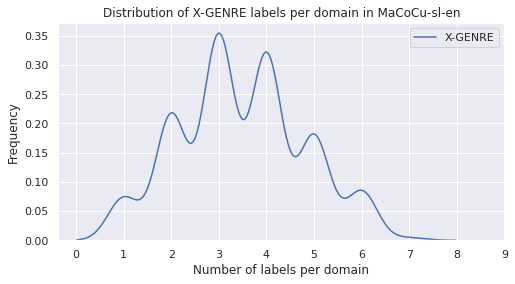

In [35]:
sns.set(rc={"figure.figsize": (8, 4)}); np.random.seed(0)

ax = sns.kdeplot(genre_distribution["unique_values_final-X-GENRE"], x = range(10), label = "X-GENRE", bw_method = 0.25)

plt.gca().set(title='Distribution of X-GENRE labels per domain in MaCoCu-sl-en', ylabel='Frequency', xlabel="Number of labels per domain")
ax.set_xticks(range(10))
plt.legend();
plt.show()


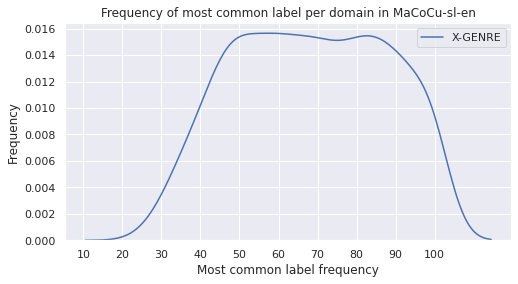

In [64]:
sns.set(rc={"figure.figsize": (8, 4)}); np.random.seed(0)

ax = sns.kdeplot(genre_distribution["most_common_label_frequency"], label = "X-GENRE", bw_method = 0.25)

plt.gca().set(title='Frequency of most common label per domain in MaCoCu-sl-en', ylabel='Frequency', xlabel="Most common label frequency")
ax.set_xticks([10,20,30,40,50,60,70,80,90,100])
plt.legend();
plt.show()